In [1]:
import networkx as nx

In [2]:
G = nx.read_gml("here.gml")

nx.write_graphml(G, "here.graphml")


# pos = nx.spring_layout(G, k=0.5, iterations=100)
# _ = nx.draw_networkx_labels(G, pos)

In [3]:
import operator
from functools import reduce

Gc = nx.condensation(G)
H = []
for i, gen in enumerate(nx.topological_generations(Gc)):
    
    nodes = reduce(operator.or_, (Gc.nodes[x]['members'] for x in gen))
    for node in nodes:
        G.nodes[node]['subset'] = i
    
    H.append(G.subgraph(nodes).copy())

    


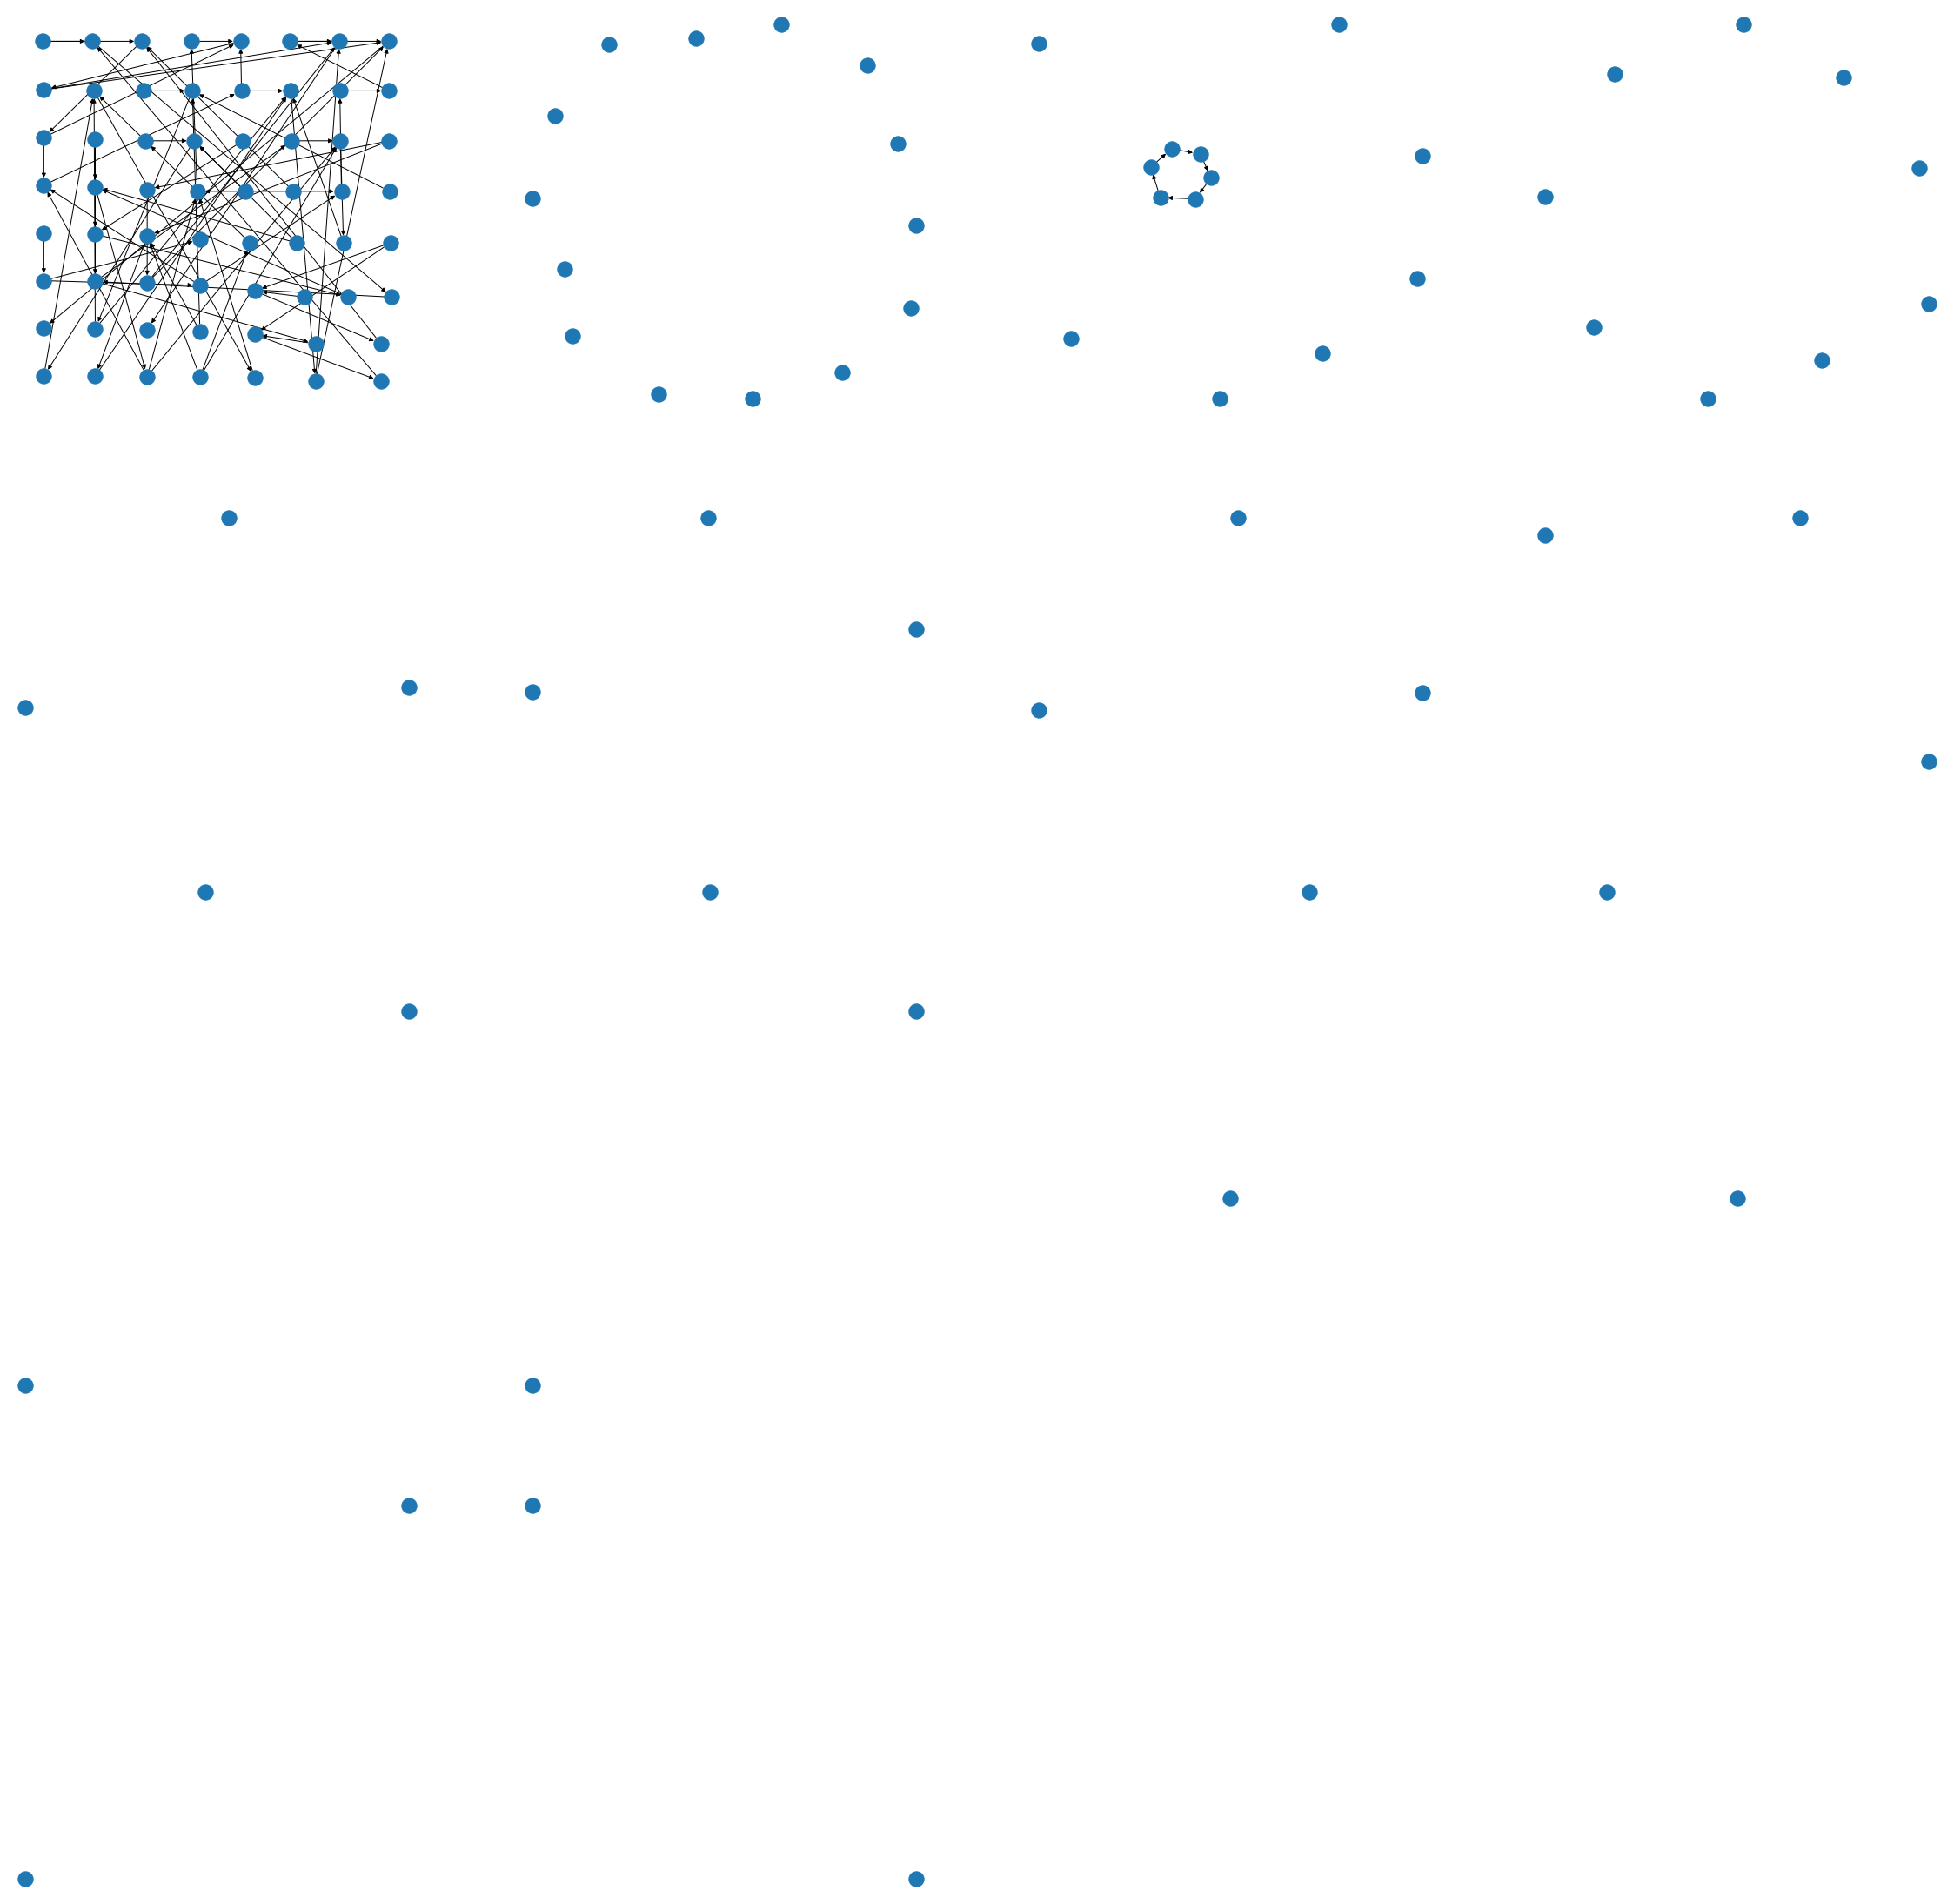

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(40, 40))


plt.subplot(4, 4, 1)
pos = nx.nx_agraph.graphviz_layout(G, prog="patchwork")
nx.draw(G, pos)


for i, Hi in enumerate(H, start=2):
    plt.subplot(4, 4, i)
    pos = nx.spring_layout(Hi)
    nx.draw(Hi, pos)
